In [1]:
from aeon.registry import all_estimators


estimators_list = all_estimators(
    filter_tags={"capability:multivariate": True},
    estimator_types="classifier",
    as_dataframe=True,
)

print(str(estimators_list.estimator[0]).split("."))




["<class 'aeon", 'classification', 'convolution_based', '_arsenal', "Arsenal'>"]


In [2]:
import importlib
from librosa import ex
import numpy as np

tmp = []

for idx in range (len(estimators_list)):
    try:
        base_name = str(estimators_list.estimator[idx]).split(".")[2]
        module_name = str(estimators_list.estimator[idx]).split(".")[3]
        estimator_name = estimators_list.name[idx]
        if (
            estimator_name != "ChannelEnsembleClassifier" and 
            estimator_name != "DummyClassifier" and
            estimator_name != "ElasticEnsemble" and
            estimator_name != "IndividualInceptionClassifier" and
            estimator_name != "IndividualLITEClassifier" and
            estimator_name != "IndividualInceptionClassifier" and
            estimator_name != "InceptionTimeClassifier" and
            estimator_name != "LITETimeClassifier" and
            estimator_name != "LearningShapeletClassifier" and 
            estimator_name != "MUSE"
        ):
            estimator_module = importlib.import_module(f"aeon.classification.{base_name}.{module_name}")
            estimator_class = getattr(estimator_module, estimator_name)
            estimator = estimator_class()
            try:
                tmp_est = estimator
                tmp.append([estimator_name, estimator])
            except Exception as e:
                print(f"Error with {estimators_list.name[idx]}")
                print(e)
            
        elif estimator_name == "DummyClassifier":
            estimator_module = importlib.import_module(f"aeon.classification.{base_name}")
            estimator_class = getattr(estimator_module, estimator_name)
            estimator = estimator_class()
            tmp.append([estimator_name, estimator])
    except Exception as e:
        print(f"Error with {estimators_list.name[idx]}")
        print(e)
        continue
res = np.array(tmp)    


Error with CNNClassifier
CNNClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with EncoderClassifier
EncoderClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with FCNClassifier
FCNClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with MLPClassifier
MLPClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with ResNetClassifier
ResNetClassifier requires python version to be <3.12, but system python version is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)].
Error with SignatureClassifier
SignatureClassifier 

In [9]:
from aeon.classification.convolution_based import Arsenal
from aeon.datasets import load_unit_test

X_train, y_train = load_unit_test(split="train")

for idx in range(len(res)):
    print(res[idx][0])
    try:
        print(res[idx][1].fit(X_train, y_train), '\n')
    except Exception as e:
        print(f"Error with {estimators_list.name[idx]}")
        print(e)
        continue 
        


Arsenal
Arsenal() 

CanonicalIntervalForestClassifier
CanonicalIntervalForestClassifier() 

Catch22Classifier
Catch22Classifier() 

DrCIFClassifier
DrCIFClassifier() 

DummyClassifier
DummyClassifier() 

FreshPRINCEClassifier
FreshPRINCEClassifier() 

HIVECOTEV2
HIVECOTEV2() 

HydraClassifier
HydraClassifier() 

IndividualOrdinalTDE
IndividualOrdinalTDE() 

IndividualTDE
IndividualTDE() 

IntervalForestClassifier
IntervalForestClassifier() 

KNeighborsTimeSeriesClassifier
KNeighborsTimeSeriesClassifier() 

MUSE
MUSE() 

MultiRocketHydraClassifier
MultiRocketHydraClassifier() 

OrdinalTDE
OrdinalTDE() 

QUANTClassifier
QUANTClassifier() 

RDSTClassifier
RDSTClassifier() 

REDCOMETS
REDCOMETS() 

RISTClassifier
RISTClassifier() 

RSTSF
RSTSF() 

RandomIntervalClassifier
RandomIntervalClassifier() 

RandomIntervalSpectralEnsembleClassifier
RandomIntervalSpectralEnsembleClassifier() 

RocketClassifier
RocketClassifier() 

ShapeletTransformClassifier
ShapeletTransformClassifier() 

SummaryC

In [ ]:
res[0][1].create_test_instance(parameter_set='default', return_first=True)

In [4]:
weights = []
for i in range(len(res)):
    weights.append(1)

In [12]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
import seaborn as sns
from aeon.datasets import load_italy_power_demand
from aeon.classification.compose import WeightedEnsembleClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Загрузка набора данных
X_train, y_train = load_italy_power_demand(split="train")
X_test, y_test = load_italy_power_demand(split="test")


In [13]:

# Создание ансамблевого классификатора
ensemble_clf = WeightedEnsembleClassifier(classifiers=list(res[:,1]), weights=weights)

# Обучение ансамблевого классификатора
ensemble_clf.fit(X_train, y_train)


WeightedEnsembleClassifier(classifiers=[Arsenal(),
                                        CanonicalIntervalForestClassifier(),
                                        Catch22Classifier(), DrCIFClassifier(),
                                        DummyClassifier(),
                                        FreshPRINCEClassifier(), HIVECOTEV2(),
                                        HydraClassifier(),
                                        IndividualOrdinalTDE(), IndividualTDE(),
                                        IntervalForestClassifier(),
                                        KNeighborsTimeSeriesClassifier(),
                                        MultiRocketHydraClassifier(),
                                        OrdinalTDE(), QUANTClassif...
                                        RISTClassifier(), RSTSF(),
                                        RandomIntervalClassifier(),
                                        RandomIntervalSpectralEnsembleClassifier(),
                                        RocketClassifier(),
                                        ShapeletTransformClassifier(),
                                        SummaryClassifier(),
                                        SupervisedIntervalClassifier(),
                                        SupervisedTimeSeriesForest(),
                                        TSFreshClassifier(),
                                        TemporalDictionaryEnsemble(),
                                        TimeSeriesForestClassifier()],
                           weights=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
code_pred = np.unique(y_train)

from sklearn.preprocessing import (LabelEncoder)

le = LabelEncoder()

pes = le.fit(y_train)

enc = pes.transform(y_train)
#dec = pes.inverse_transform(y_pred)
    


In [27]:

# Прогнозирование на тестовой выборке
y_pred = ensemble_clf.predict(X_test)


In [28]:
y_pred_dec = pes.inverse_transform(y_pred)

In [20]:
def decode_pred(idx):
    return code_pred[idx]

pred = np.array(list(map(decode_pred, y_pred)))
y_pred = pred

In [ ]:

pred = []

for item in y_pred:
    if item == 0:
        tmp = '1'
    elif item == 1:
        tmp = '2'

    pred.append(tmp)

y_pred = pred


Точность ансамблевого классификатора: 0.97

Отчет о классификации:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       513
           2       0.97      0.97      0.97       516

    accuracy                           0.97      1029
   macro avg       0.97      0.97      0.97      1029
weighted avg       0.97      0.97      0.97      1029



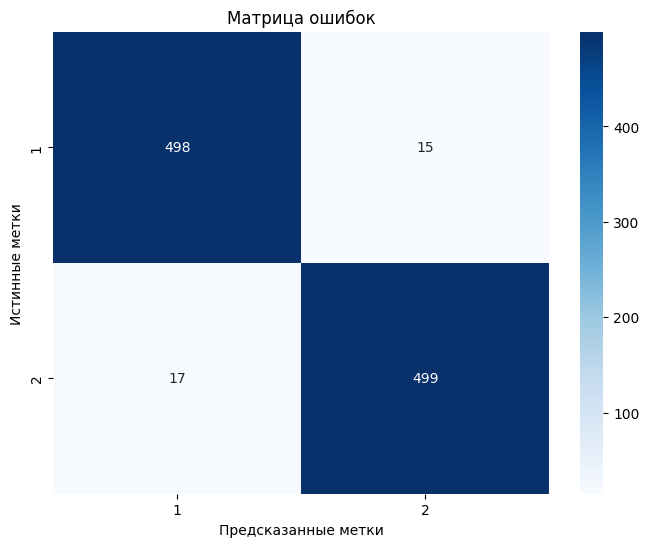

In [31]:
# Use y_test_encoded and y_pred_encoded for evaluation
accuracy = accuracy_score(y_test, y_pred_dec)
print(f"Точность ансамблевого классификатора: {accuracy:.2f}")

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_dec))

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred_dec)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=ensemble_clf.classes_,
    yticklabels=ensemble_clf.classes_
)
plt.title("Матрица ошибок")
plt.ylabel("Истинные метки")
plt.xlabel("Предсказанные метки")
plt.show()